# SVM

2種類のラベルのついた点群をラベルに応じて超平面で分割することを考える。  
2次元データの場合は，以下のような直線(超平面)が考えられる。

1
<img src="./SVM_data/SVM_concept/スライド1.png" width="640" height="480">

2
<img src="./SVM_data/SVM_concept/スライド2.png" width="640" height="480">

3
<img src="./SVM_data/SVM_concept/スライド3.png" width="640" height="480">

4
<img src="./SVM_data/SVM_concept/スライド4.png" width="640" height="480">

分類直線の式  
$$
    \boldsymbol{y}=w_0 + \sum_{i=1}^{n}w_{i}x_{i}=w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}
$$  
$\boldsymbol{w}^{T}\boldsymbol{x}$の符号が分類のラベルを意味する。($y_{i}=-1 \:または\: y_{i}=1$)

ラベルを持つデータ点が正しく分類されている場合は$y_{i}(w_{0}+\boldsymbol{w}^{T}\boldsymbol{x}_{i})>0$となる。

すべてのデータが正しく分類されるという仮定のもとでは、  
i番目の点から直線への距離は  
$$
    \frac{y_{i}(w_{0}+\boldsymbol{w}^{T}\boldsymbol{x}_{i})}{||\boldsymbol{w}||}
$$

マージン最大化の数式表現  
$$
    Max_{w_{0}, \boldsymbol{w}} \:Min_{i} \frac{y_{i}(w_{0}+\boldsymbol{w}^{T}\boldsymbol{x}_{i})}{||\boldsymbol{w}||}
$$  
1. 直線(超平面)を仮置きする。
2. 直線に対して最も近いデータ点の距離を求める。
3. マージンを最大化する。  

$||\boldsymbol{w}||$はiに依存しないので，$\frac{1}{||\boldsymbol{w}||}$を$Min_{i}$の外に出せて，次の最適化問題を考えることと同じになる。

$$
    Max_{w_{0}, \boldsymbol{w}}\; \frac{1}{||\boldsymbol{w}||}\:Min_{i}y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i})
$$

ここで$w_{0}$と$\boldsymbol{w}$のすべての要素を$\kappa$倍して，$w_{0} \rightarrow \kappa w_{0}$，$\boldsymbol{w} \rightarrow \kappa\boldsymbol{w}$と置き換えたとしても，$\frac{1}{||\boldsymbol{w}||}$の分母から$\kappa$がでてきて，$w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i}$からも$\kappa$が出てきて約分されて，元の式と同じになるので，$min_{i}y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i})$は1の場合のみを考えても問題ない。

よって，最適化問題は次に簡略化できる。
$$
    Max_{w_{0}, \boldsymbol{w}}\frac{1}{||\boldsymbol{w}||}
$$

ただし，ここでは制約式として$min_{i}y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i})=1$と$y_{i}(w_{0}+\boldsymbol{w}^{T}\boldsymbol{x}_{i})>0$を考えなければならない。すなわち，  
制約式
$$
    y_{i}(w_{0}+\boldsymbol{w}^{T}\boldsymbol{x}_{i})\ge1
$$

次に$\frac{1}{||\boldsymbol{w}||}$を最大化することは$\boldsymbol{||w||}$を最小化することと同じであり，$||\boldsymbol{w}||$を最小化したときに得られる$w_{0}, \boldsymbol{w}$は,$\frac{1}{2}||\boldsymbol{w}||^{2}$を最大化したときと変わらないので，次の最適化問題に簡略化できる。

$$
    Min_{w_{0}, \boldsymbol{w}}\;\frac{1}{2}||\boldsymbol{w}||^{2} \\
    s.t\: y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i})\ge1
$$

これをラグランジュの未定乗数法で解く。制約式がデータ点の数だけn個あるので，ベクトル変数$\boldsymbol{a}=(a_1, a_2, \cdots ,a_n)^{T}$を導入して，ラグランジュ関数は  
  
$$
    L(w_{0}, \boldsymbol{w}, \boldsymbol{a})=\frac{1}{2}||\boldsymbol{w}||^{2} - \sum_{i=1}^{n}a_{i}\bigl( y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i} - 1) \bigr)
$$

$w_{0}$と$\boldsymbol{w}$についての偏微分が0という条件より  
  
$$
    \frac{\partial}{\partial w_{0}}L(w_{0}, \boldsymbol{w}, \boldsymbol{a})=-\sum_{i=1}^{n}a_{i}y_{i}=0 \\
    \frac{\partial}{\partial \boldsymbol{w}}L(w_{0}, \boldsymbol{w}, \boldsymbol{a})=w_{j} - \sum_{i=1}^{n}a_{i}y_{i}x_{ij}=0
$$
より  
$$
    ∴\sum_{i=1}^{n}a_{i}y_{i}=0 ・・・(1)\\
    ∴w_{j}=\sum_{i=1}^{n}a_{i}y_{i}x_{ij}\quad(j=1,2,\cdots,d)・・・(2)
$$

KKT条件は

$$
    a_{i} \ge 0 \\
    -y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i}) + 1 \le 0 \\
    a_{i}\bigl(y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i}) - 1 \bigr) = 0
$$

これらをラグランジュ関数Lに代入する。式が長いので，別々に計算する。

第一項(n:データ数, d:特徴量数)  
(2)を代入  
$$
    \begin{align}
    \frac{1}{2}||\boldsymbol{w}||^{2} &= \frac{1}{2}\sum_{j=1}^{d}\boldsymbol{w}_{j}^{2} \\
    &= \frac{1}{2}\sum_{j=1}^{d}\biggl( \sum_{i=1}^{n}a_{i}y_{i}x_{ij} \biggr)^{2} \\
    &= \frac{1}{2}\sum_{j=1}^{d}\biggl( \sum_{k=1}^{n}a_{k}y_{k}x_{kj} \biggr)\biggl( \sum_{l=1}^{n}a_{l}y_{l}x_{lj} \biggr) \\
    &= \frac{1}{2}\sum_{j=1}^{d}\sum_{k=1}^{n}\sum_{l=1}^{n}a_{k}a_{l}y_{k}y_{l}x_{kj}x_{lj} \\
    &= \frac{1}{2}\sum_{k=1}^{n}\sum_{l=1}^{n}\biggl(a_{k}a_{l}y_{k}y_{l}x_{k1}x_{l1} + a_{k}a_{l}y_{k}y_{l}x_{k2}x_{l2} + \cdots a_{k}a_{l}y_{k}y_{l}x_{kd}x_{ld}\biggr) \\
    &= \frac{1}{2}\sum_{k=1}^{n}\sum_{l=1}^{n}\Biggl(a_{k}a_{l}y_{k}y_{l}\bigl(x_{k1}x_{l1} + \cdots + x_{kd}x_{ld}\bigr)\Biggr) \\
    &= \frac{1}{2}\sum_{k=1}^{n}\sum_{l=1}^{n}a_{k}a_{l}y_{k}y_{l}\boldsymbol{x}_{k}^{T}\boldsymbol{x}_{l}
    \end{align}    
$$

第二項(n:データ数, d:特徴量数)  
(2)を代入  
$$
    \begin{align}
        - \sum_{i=1}^{n}a_{i}\bigl( y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i} - 1) \bigr) & = 
        - \sum_{i=1}^{n}a_{i}\Biggl(y_{i}\bigl(w_{0} + \sum_{l=1}^{n}a_{l}y_{l}\sum_{j=1}^{d}x_{lj}x_{ij}\bigr) - 1\Biggr)\\
        &= -w_{0}\sum_{i=1}^{n}a_{i}y_{i} - \sum_{i=1}^{n}\sum_{l=1}^{n}a_{i}y_{i}a_{l}y_{l}\boldsymbol{x}_{l}^{T}\boldsymbol{x}_{i} + \sum_{i=1}^{n}a_{i}・・・(1)を代入\\
        &= - \sum_{i=1}^{n}\sum_{l=1}^{n}a_{i}y_{i}a_{l}y_{l}\boldsymbol{x}_{l}^{T}\boldsymbol{x}_{i} + \sum_{i=1}^{n}a_{i}
    \end{align}
$$

したがって，ラグランジュ関数は(index kとiは同じ)

$$
\begin{align}
    L(w_{0}, \boldsymbol{w}, \boldsymbol{a}) &= \frac{1}{2}\sum_{i=1}^{n}\sum_{l=1}^{n}a_{i}a_{l}y_{i}y_{l}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{l} - \sum_{i=1}^{n}\sum_{l=1}^{n}a_{i}y_{i}a_{l}y_{l}\boldsymbol{x}_{l}^{T}\boldsymbol{x}_{i} + \sum_{i=1}^{n}a_{i} \\
    &= \sum_{i=1}^{n}a_{i} - \frac{1}{2}\sum_{i=1}^{n}\sum_{l=1}^{n}a_{i}a_{l}y_{i}y_{l}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{l}
\end{align}
$$

つまり，$w_{0}$，$\boldsymbol{w}$，$\boldsymbol{a}$の変数についての最適化問題だったものが$\boldsymbol{a}$だけの2次最適化問題になった。  
制約式は$a$に関するものだけを選べばよい。

双対形のラグランジュ関数 変数は$\boldsymbol{a}$のみなので$f(\boldsymbol{a})$となる  
$$
    Max\;f(\boldsymbol{a}) = \sum_{i=1}^{n}a_{k} - \frac{1}{2} \sum_{i=1}^{n} \sum_{l=1}^{n} a_{i} a_{l} y_{i} y_{l} \boldsymbol{x}_{i}^{T}\boldsymbol{x}_{l} ・・・(3)\\
    -\frac{1}{2}\boldsymbol{a}^{T}diag(y_{1}y_{1}\boldsymbol{x}_{1}^{T}\boldsymbol{x}_{1},
                     y_{1}y_{2}\boldsymbol{x}_{1}^{T}\boldsymbol{x}_{2},
                     \cdots,
                     y_{n}y_{n-1}\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{n-1},
                     y_{n}y_{n}\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{n})\boldsymbol{a}
                     + \boldsymbol{1}^{T}\boldsymbol{a} \\
    s.t \\
    \sum_{i=1}^{n}a_{i}y_{i}=0 線形制約\\
    \quad a_{i}\ge0 \\
    a_{i}\biggl(y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i}) - 1 \biggr) = 0
$$

これを__汎用の2次計画問題ソルバ__で解くこともできる(非線形凸関数最適化の勾配降下法も使える)が，線形成約の特性着目してソルバより効率の良いアルゴリズムがある

## Platのアルゴリズム (SMO: Sequential Minimum Optimizer) 
  
最後の制約式 $a_{i}\biggl(y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i}) - 1 \biggr) = 0$について  
$y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i}) \neq 1$のときは，$a_{i}=0$となる。
一方，$y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i}) = 1$のときは$a_{i}\ge0$で,このときのデータ点$\boldsymbol{x}_{i}$はサポートベクトルであり，マージン境界線上に乗っている。  
つまり，サポートベクトルに対応するラグランジュ変数$a_{i}$だけを考えれば良い。

最適化問題(3)はパラメータ数が多い複雑な2次計画問題のように見えるが，サポートベクトルと対応するラグランジュ変数$a_{i}$だけを考えれば，  
残りのパラメータは無視できる。

### アルゴリズム概要  
・初期値$\boldsymbol{a}^{0}$を選び，以下を繰り返す。  
1. ある基準にもとづいてインデックス$i,j$を選択する。
2. $a_{i}$と$a_{j}$だけを動かして，他を固定して最適な$a_{i}, a_{j}$を求める。

### 先に2.の$a_{i}$と$a_{j}$の最適化方法について  
・サポートベクターが決まり、分類直線までのマージンを最大化することに相当

制約条件が意味するのは、どれかひとつの変数$a_{i}$ の値を変える場合は、その変化分を補償するように, (最低で)もうひとつ別の変数$a_{j}$も動かさなければならない。そして、その2変数$a_{i}, a_{j}$だけを動かす場合であれば、最大値をとる解は解析的に求めることができる。  
これを利用して$\boldsymbol{a}=(a_{1},a_{2},\cdots,a_{n})$から2つを選んで値を変えるという行為を必要な回数だけ繰り返すことで、逐次的にグローバルな最適解に近づけていく。

まず，最適化される式をインデックス$i,j$とそれ以外に分離する。

第二項について$\sum_{i=1}^{n}\sum_{l=1}^{n}$の部分を分解する。※インデックスiを使うため，既存のiをkに変更。
$$
\begin{align}
    \sum_{i=1}^{n}\sum_{l=1}^{n}a_{i}a_{l}y_{i}y_{l}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{l}
    &= \bigl(\sum_{k=1}^{n}a_{k}y_{k}\boldsymbol{x}_{k}^{T}\bigr)\bigl(\sum_{l=1}^{n}a_{l}y_{l}\boldsymbol{x}_{l}\bigr)  \\
    &= \bigl(a_{i}y_{i}\boldsymbol{x}_{i}^{T} + a_{j}y_{j}\boldsymbol{x}_{j}^{T} + \sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k}^{T}\bigr)\bigl(a_{i}y_{i}\boldsymbol{x}_{i} + a_{j}y_{j}\boldsymbol{x}_{j} + \sum_{l \neq i,j}^{n-2}a_{l}y_{l}\boldsymbol{x}_{l}^{T}\bigr)  \\
    &= a_{i}^{2}y_{i}^{2}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{i} + a_{j}^{2}y_{j}^{2}\boldsymbol{x}_{j}^{T}\boldsymbol{x}_{j} + 2a_{i}a_{j}y_{i}y_{j}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j} + 2\sum_{k \neq i,j}^{n-2}a_{i}a_{k}y_{i}y_{k}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{k} + 2\sum_{k \neq i,j}^{n-2}a_{j}a_{k}y_{j}y_{k}\boldsymbol{x}_{j}^{T}\boldsymbol{x}_{k} + \sum_{k \neq i,j}^{n-2}\sum_{l \neq i,j}^{n-2}a_{k}a_{l}y_{k}y_{l}\boldsymbol{x}_{k}^{T}\boldsymbol{x}_{l}  \\
    &= a_{i}^{2}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{i} + a_{j}^{2}\boldsymbol{x}_{j}^{T}\boldsymbol{x}_{j} + 2a_{i}a_{j}y_{i}y_{j}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j} + 2a_{i}y_{i}\boldsymbol{x}_{i}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k} + 2a_{j}y_{j}\boldsymbol{x}_{j}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k} + \sum_{k \neq i,j}^{n-2}\sum_{l \neq i,j}^{n-2}a_{k}a_{l}y_{k}y_{l}\boldsymbol{x}_{k}^{T}\boldsymbol{x}_{l}・・・(y_{i}^{2}=1, y_{j}^{2}=1)
\end{align}
$$

最大化したい関数$f(\boldsymbol{a})$は  

$$
\begin{align}
    f(\boldsymbol{a}) &= \sum_{k \neq i,j}^{n-2}a_{k} + a_{i} + a_{j} - \frac{1}{2}\Biggl( a_{i}^{2}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{i} + a_{j}^{2}\boldsymbol{x}_{j}^{T}\boldsymbol{x}_{j} + 2a_{i}a_{j}y_{i}y_{j}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j} + 2a_{i}y_{i}\boldsymbol{x}_{i}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k} + 2a_{j}y_{j}\boldsymbol{x}_{j}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k} + \sum_{k \neq i,j}^{n-2}\sum_{l \neq i,j}^{n-2}a_{k}a_{l}y_{k}y_{l}\boldsymbol{x}_{k}^{T}\boldsymbol{x}_{l} \Biggr)  \\
    &= \sum_{k \neq i,j}^{n-2}a_{k} - \frac{1}{2}a_{i}^{2}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{i} - \frac{1}{2}a_{j}^{2}\boldsymbol{x}_{j}^{T}\boldsymbol{x}_{j} - a_{i}a_{j}y_{i}y_{j}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j} + a_{i}\biggl(1 - y_{i}\boldsymbol{x}_{i}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k}\biggr) + a_{j}\biggl(1 - y_{j}\boldsymbol{x}_{j}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k}\biggr) - \frac{1}{2}\sum_{k \neq i,j}^{n-2}\sum_{l \neq i,j}^{n-2}a_{k}a_{l}y_{k}y_{l}\boldsymbol{x}_{k}^{T}\boldsymbol{x}_{l}
\end{align}
$$

ここで,  
$A = -\frac{1}{2}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{i}$  
$B = -\frac{1}{2}\boldsymbol{x}_{j}^{T}\boldsymbol{x}_{j}$  
$C = -y_{i}y_{j}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j}$  
$D = 1 - y_{i}\boldsymbol{x}_{i}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k}$  
$E = 1 - y_{j}\boldsymbol{x}_{j}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k}$  
$F = \sum_{k \neq i,j}^{n-2}a_{k} - \frac{1}{2}\sum_{k \neq i,j}^{n-2}\sum_{l \neq i,j}^{n-2}a_{k}a_{l}y_{k}y_{l}\boldsymbol{x}_{k}^{T}\boldsymbol{x}_{l}$  
と置くと,


$$
    f(\boldsymbol{a}) = Aa_{i}^{2} + Ba_{j}^{2} + Ca_{i}a_{j} + Da_{i} + Ea_{j} + F・・・(4)
$$

ここで，(1)の制約式を分離して変形すると，  
$$
    a_{i}y_{i} + a_{j}a_{j} + \sum_{k \neq i,j}^{n-2}a_{k}y_{k} = 0  \\
    ∴a_{j} = \frac{1}{y_{j}}\biggr(-a_{i}y_{i} - \sum_{k \neq i,j}^{n-2}a_{k}y_{k}\biggr)
$$  
また，$\sum_{k \neq i,j}^{n-2}a_{k}y_{k} = G$とおくと，$a_{j} = y_{j}(-a_{i}y_{i} - G)\:$(ただし，$y_{j}^{2}=1$で$y_{j}=\frac{1}{y_{j}}$)となり，これを(4)に代入すると

$$
    f(\boldsymbol{a}) = Aa_{i}^2 + By_{j}^{2}(-a_{i}y_{i} - G)^{2} + Ca_{i}y_{j}(-a_{i}y_{i} - G) + Da_{i} + Ey_{j}(-a_{i}y_{i} - G) + F  \\
$$

$$
    f(\boldsymbol{a}) = (A + B - y_{i}y_{j}C)a_{i}^{2} + (2y_{i}BG-y_{j}CG+D-y_{i}y_{j}E)a_{i} + (BG^{2} - y_{j}EG + F)
$$

$$
\begin{align}
    (a_{i}^{2}の係数) &= A + B - y_{i}y_{j}C  \\
    & = -\frac{1}{2}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{i} -\frac{1}{2}\boldsymbol{x}_{j}^{T}\boldsymbol{x}_{j} - (y_{i}y_{j})(-y_{i}y_{j}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j})  \\
    & = -\frac{1}{2}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{i} -\frac{1}{2}\boldsymbol{x}_{j}^{T}\boldsymbol{x}_{j} + \boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j}  \\
    &= -\frac{1}{2}(\boldsymbol{x}_{i} - \boldsymbol{x}_{j})^{T}(\boldsymbol{x}_{i} - \boldsymbol{x}_{j})  \\
    &= -\frac{1}{2}||\boldsymbol{x}_{i} - \boldsymbol{x}_{j}||^{2}
\end{align}
$$

$$
\begin{align}
    (a_{i}の係数) &= 2y_{i}BG-y_{j}CG+D-y_{i}y_{j}E   \\
     &= 2y_{i}\biggl(\frac{1}{2}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j}\biggr)\biggl(\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\biggr) - y_{j}(-y_{i}y_{j}\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j})\biggl(\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\biggr) 1 + y_{i}\boldsymbol{x}_{i}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k} - y_{i}y_{j}\biggl(1 - y_{j}\boldsymbol{x}_{j}^{T}\sum_{k \neq i,j}a_{k}y_{k}x_{k}\biggr)  \\
    &= 1 - y_{i}y_{j} + y_{i}\Biggl[-\boldsymbol{x}_{j}^{T}\boldsymbol{x}_{j}\biggl(\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\biggr) + \boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j}\biggl(\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\biggr) - \boldsymbol{x}_{i}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k} + \boldsymbol{x}_{j}^{T}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k}\Biggr]  \\
    &= 1 - y_{i}y_{j} + y_{i}\Biggl[ \boldsymbol{x}_{i}^{T}\biggl( \boldsymbol{x}_{j}\sum_{k \neq i,j}^{n-2}a_{k}y_{k} - \sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k} \biggr) - \boldsymbol{x}_{j}^{T}\biggl( \boldsymbol{x}_{j}\sum_{k \neq i,j}^{n-2}a_{k}y_{k} - \sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k} \biggr) \Biggr]  \\
    &= 1 - y_{i}y_{j} + y_{i}(\boldsymbol{x}_{i}^{T} - \boldsymbol{x}_{j}^{T})\Biggl( \boldsymbol{x}_{j}\sum_{k \neq i,j}^{n-2}a_{k}y_{k} - \sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k}  \Biggr)  \\
    &= 1 - y_{i}y_{j} + y_{i}(\boldsymbol{x}_{i} - \boldsymbol{x}_{j})^{T}\Biggl( \boldsymbol{x}_{j}\sum_{k \neq i,j}^{n-2}a_{k}y_{k} - \sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k}  \Biggr)
\end{align}
$$

ここで，2次関数(凸関数)の平方完成による最適解は
<img src="./SVM_data/2次凸関数の平方完成と極値最適解.png">  
なので，最適解は$-\frac{b}{2a}$となり

$$
    \hat{a_{i}} = \frac{1}{||\boldsymbol{x}_{i} - \boldsymbol{x}_{j}||^{2}}\Biggl[ 1 - y_{i}y_{j} + y_{i}(\boldsymbol{x}_{i} - \boldsymbol{x}_{j})^{T}\Biggl( \boldsymbol{x}_{j}\sum_{k \neq i,j}^{n-2}a_{k}y_{k} - \sum_{k \neq i,j}^{n-2}a_{k}y_{k}\boldsymbol{x}_{k}  \Biggr) \Biggr]
$$  
が凸関数の最適解となる。$\hat{a_{i}}$が決まると  
$$
    \hat{a_{j}} = y_{i}\Biggl(-\hat{a_{i}}y_{i} - \boldsymbol{x}_{j}\sum_{k \neq i,j}^{n-2}a_{k}y_{k}\Biggr)
$$  
によって，$\hat{a_{j}}$が決まる。

しかし，ここで制約条件$a_{i}>0, a_{j}>0$を考慮する必要がある。もし，$a_{i}<0$ならば$a_{i}=0$となり$a_{j}<0$ならば$a_{j}=0$が実際の最適解となる。  
以上が「$a_{i}>0$と$a_{j}>0$だけを動かして他を固定して最適化する」方法⇐サポートベクターを決めてから分類直線までのマージンを最大化することに相当

## 次にインデックスi,jを決める方法

$$
    i = argmin_{t \in I_{-}(\boldsymbol{y}, \boldsymbol{a})}y_{t}\nabla f(\boldsymbol{a})_{t} \\ 
    j = argmin_{t \in I_{+}(\boldsymbol{y}, \boldsymbol{a})}y_{t}\nabla f(\boldsymbol{a})_{t}
$$

$$
                I_{-}(\boldsymbol{y}, \boldsymbol{a}) = \{t| y_{t}=-1 または a_{t} > 0\} \\
                I_{+}(\boldsymbol{y}, \boldsymbol{a}) = \{t| y_{t}=+1 または a_{t} > 0\}
$$

<img src="./SVM_data/SVM_concept/スライド6.png">

### インデックスi, jを決める根拠

式(3)について、$\boldsymbol{a}$を変数としてラグランジュの未定乗数法を適用する。

目的関数$f(\boldsymbol{a})$のラグランジュ関数は  
$$
    L(\boldsymbol{a}) + \lambda\sum_{i=1}^{n}a_{i}y_{i} - \boldsymbol{\mu}^{T}\boldsymbol{a}
$$  
KKT条件
$$
    \mu_{j}a_{j} = 0, \mu_{j}\le 0
$$

ラグランジュ関数Lの$\boldsymbol{a}$についての勾配をとって=0とおくと,  
$$
    \nabla f(\boldsymbol{a}) + \lambda\boldsymbol{y}-\boldsymbol{\mu}=0
$$

成分に注目すると  
$$
    \nabla f(\boldsymbol{a})_{t} + \lambda y_{t} =\mu_{t} \le 0
$$

KKT条件に注目すると$a_{t}>0$のときは、$\mu_{t}=0$。$a_{t}=0$のときに、$\mu_{t}$は任意に動かせる。

まずは、$a_{t}=0$のときについて考えると、$y_{t}=1$または$y_{t}=-1$であることに注意して、
この式の両辺に$y_{t}$をかけて整理すると次が得られる

$$
    y_{t}\nabla f(\boldsymbol{a})_{t} \ge -\lambda \quad(y_{t} = -1) ・・・i\\
    y_{t}\nabla f(\boldsymbol{a})_{t} \le -\lambda \quad(y_{t} = 1)・・・j
$$

$$
    min_{t \in I_{-}(\boldsymbol{y},\boldsymbol{a})} y_{t} \nabla f(\boldsymbol{a})_{t} \ge max_{t \in I_{+}(\boldsymbol{y},\boldsymbol{a})} y_{t} \nabla f(\boldsymbol{a})_{t}
$$

この条件が成立しなくなったときに、$\boldsymbol{a}$を変更しようというのがi, jを決定するアイディア。

つまり、最適解においては「$y_{t}=-1またはa_{t}>0$」ならば$y_{t}\nabla f(\boldsymbol{a})_{t} \ge -\lambda$。「$y_{t}=1またはa_{t}>0$」ならば$y_{t}\nabla f(\boldsymbol{a})_{t} \le -\lambda$

<img src="./SVM_data/SVM_concept/スライド7.png">

ここで  
$$
    \nabla f(\boldsymbol{a})_{t} = 1 - \sum_{l=1}^{n}a_{l}y_{t}y_{l}\boldsymbol{x}_{t}^{T}\boldsymbol{x}_{l}
$$  
となる

### $\boldsymbol{w}$と$w_{0}$の算出方法

$\boldsymbol{a}$が決まると式(2)で$w_{j}(j=1,2,\cdots,d)$が求まる。  

$$
    ∴w_{j}=\sum_{i=1}^{n}a_{i}y_{i}x_{ij}\quad(j=1,2,\cdots,d)・・・(2)
$$

$w_{0}$については$ a_{i}\biggl(y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i}) - 1 \biggr) = 0$だから、$a_{i} \neq 0$となるインデックスiを一つ見つけて,$y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}_{i}) = 1$から$w_{0}$を求めることもできるが、数値的安定解は以下となる。

$$
    S=\{i|a_{i} \neq 0\} \\
    w_{0}=\frac{1}{|S|}\sum_{k \in S}\biggl(y_{k} - \sum_{l \in S}a_{l}y_{l}\boldsymbol{x}_{k}^{T}\boldsymbol{x}_{l}\biggr)
$$

ハードマージンSVM(SVC)の実装

In [4]:
import numpy as np
from operator import itemgetter

class HardSVC:
    
    def fit(self, X, y, selections=None):
        
        a = np.zeros(X.shape[0]) # ラグランジュ変数
        ay = 0 # sum_{k=1}^[n]a_[k]y_[k]
        ayx = np.zeros(X.shape[1]) # sum_[k=1]^[n]a_[k]y_[k]X[k]
        yx = y.reshape(-1, 1)*X # (N, M)
        indices = np.arange(X.shape[0]) # (N,)
        
        while True:
            
            # インデックスiに関する集合 >= インデックスjに関する集合であることが求められる
            ydf = y*(1 - np.dot(yx, ayx.T)) # (N,)
            iydf = np.c_[indices, ydf] # (N, 2)
            i = int(min(iydf[ (y<0) | (a>0) ], key=itemgetter(1))[0]) # インデックスの選択方法
            j = int(max(iydf[ (y>0) | (a>0) ], key=itemgetter(1))[0]) # itemgetter(1) : 第二列aについて最小値を求める
            
            # インデックス選択の条件が満たされていれば終了→最適条件となっている
            if ydf[i] >= ydf[j]:
                print('while finish 1')
                break
           
            # 最適条件となっていない場合、ai, ajを更新
            ay2 = ay - y[i]*a[i] - y[j]*a[j] # インデックスi,jの成分を差し引いたayとayx (※集合演算)
            ayx2 = ayx - y[i]*a[i]*X[i, :] - y[j]*a[j]*X[j, :] # (M,) = (M,) - (M,)
            ai = ((1 - y[i]*y[j] + y[i]*np.dot(X[i, :] - X[j, :], X[j, :]*ay2 - ayx2)) / ((X[i] - X[j])**2).sum())
            if ai < 0:
                ai = 0    
            aj = (-ai*y[i] - ay2)*y[i]
            if aj < 0:
                aj = 0
                ai = (-aj*y[j] - ay2)*y[i] # 気になる一行 →　aiとajの一次結合は一定だから...
            print("ai:", ai)
            print("a[i]:", a[i])
            print("aj:", aj)
            print("a[j]:", a[j])
            
            # a[i],a[j]が変化してもayとayzは一定にならなければならない(変化量はa[i]とa[j]で分配している)?
            ay += y[i]*(ai - a[i]) + y[j]*(aj - a[j])
            ayx += y[i]*(ai - a[i])*X[i, :] + y[j]*(aj - a[j])*X[j, :]
           
            # aiの更新が起きない場合終了
            if ai == a[i]:
                print('while finish 2')
                break
            
            # aiとajの更新
            a[i] = ai
            a[j] = aj
        
        # 最適パラメータの決定
        self.a_ = a # (N,)
        not_a_index = a != 0. # (N,)
        self.w_ = ((a[not_a_index] * y[not_a_index]).reshape(-1, 1)*X[not_a_index, :]).sum(axis=0)
        self.w0_ = (y[not_a_index] - np.dot(X[not_a_index, :], self.w_)).sum() / not_a_index.sum()
        
    def predict(self, X):
        return np.sign(self.w0_ + np.dot(X, self.w_))
        

ai: -0.0
a[i]: 0.0
aj: 0
a[j]: 0.0
while finish 2


/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/envs/Education/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


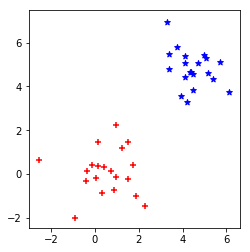

In [26]:
import matplotlib.pyplot as plt

plt.axes().set_aspect("equal")
np.random.seed(0)
X0 = np.random.randn(20, 2)
X1 = np.random.randn(20, 2) + np.array([5, 5])
y = np.array([1] * 20 + [-1] * 20)

X = np.r_[X0, X1]
model = HardSVC()
model.fit(X, y)

plt.scatter(X0[:, 0], X0[:, 1], color="r", marker="+")
plt.scatter(X1[:, 0], X1[:, 1], color="b", marker="*")

def f(model, x):
    return (-model.w0_ - model.w_[0] * x) / model.w_[1]

x1 = -0.2
x2 = 6

plt.plot([x1, x2], [f(model, x1), f(model, x2)], color="k")
plt.scatter(X[model.a_ != 0, 0], X[model.a_ != 0, 1], s=200, color=(0, 0, 0, 0), edgecolor="g", marker="o")
plt.show()

# 公式にバグ有り

# ソフトマージンSVM

<img src="./SVM_data/SVM_concept/スライド7.png">

$$
    Min \quad C\sum_{i=1}^{n}\zeta_{i}+\frac{1}{2}\sum_{i=1}^{n}||\boldsymbol{w}||^{2} \\
    s.t \quad \quad \quad \quad y_{i}(w_{0} + \boldsymbol{w}^{T}\boldsymbol{x}) \ge 1 - \zeta_{i} \quad (i=1,2,\cdots,n) \\
    \zeta_{i} \ge 0 \quad (i=1,2,\cdots,n) 
$$

ラグランジュ未定乗数法を適用

$$
    L(\boldsymbol{w},\boldsymbol{\zeta}, \boldsymbol{a})=C\sum_{i=1}^{n}\zeta_{i}+\frac{1}{2}\sum_{i=1}^{n}||\boldsymbol{w}||^{2}-\sum_{i=1}^{n}a_{i}\bigl(y_{i}(w_{0}+\boldsymbol{w}^{T}\boldsymbol{x})-1+\zeta_{i}\bigr)-\sum_{i=1}^{n}\eta_{i}\zeta_{i}
$$

KKT条件  
$$
    a_{i} \ge 0 \\
    y_{i}(w_{0}+\boldsymbol{w}^{T}\boldsymbol{x})-1+\zeta_{i} \ge 0 \\
    a_{i}\bigl(y_{i}(w_{0}+\boldsymbol{w}^{T}\boldsymbol{x})-1+\zeta_{i}\bigr)=0 \\
    \eta_{i} \ge 0 \\
    \zeta_{i} \ge 0 \\
    \eta_{i}\zeta_{i} = 0
$$

$w_{j}$で$L(\boldsymbol{w}, \boldsymbol{\zeta}, \boldsymbol{a})$を偏微分して=0とおき、$L(\boldsymbol{w}, \boldsymbol{\zeta}, \boldsymbol{a})$に代入して、

目的関数  
$$
    Max\;f(\boldsymbol{a}) = \sum_{i=1}^{n}a_{k} - \frac{1}{2} \sum_{i=1}^{n} \sum_{l=1}^{n} a_{i} a_{l} y_{i} y_{l} \boldsymbol{x}_{i}^{T}\boldsymbol{x}_{l} ・・・(\zeta_{i}が無い場合と同様の式)\\
$$

線形制約式も同じ  
$$
    \sum_{i=1}^{n}a_{i}y_{i}=0
$$

異なる部分は$L(\boldsymbol{w}, \boldsymbol{\zeta}, \boldsymbol{a})$が$\zeta_{i}$の関数なので,$\zeta_{i}$で偏微分する。

$$
    \frac{\partial L}{\partial \zeta_{i}}=C-a_{i}-\zeta_{i}=0 \quad (\zeta_{i} \ge 0)
$$

よって、  
$$
    a_{i} \le C
$$

スラック変数$\zeta_{i}$を持つ場合、SVMの双対形最適化問題  
$$
    Max\;f(\boldsymbol{a}) = \sum_{i=1}^{n}a_{k} - \frac{1}{2} \sum_{i=1}^{n} \sum_{l=1}^{n} a_{i} a_{l} y_{i} y_{l} \boldsymbol{x}_{i}^{T}\boldsymbol{x}_{l} \\
    s.t \quad \sum_{i=1}^{n}a_{i}y_{i}=0 \\
    0 \le a_{i} \le C
$$

HardSVMと同様に、更にラグランジュの未定定数法を適用して最適化された場合の$a_{i}$の条件を求める。

ラグランジュ未定乗数法  
$$
L2(\boldsymbol{a}, \lambda, \boldsymbol{\mu}, \boldsymbol{\nu}) = f(\boldsymbol{a}) + \lambda\sum_{i=1}^{n}a_{i}y_{i} - \boldsymbol{\mu}^{T}\boldsymbol{a} - \boldsymbol{\nu}(C\boldsymbol{e} - \boldsymbol{a}) \quad\;(\boldsymbol{e}=(1,1,\cdots, 1))\\
\mu_{k}a_{k} = 0 \\
\mu_{k} \le 0 \\
\nu_{k}(C-a_{k}) = 0 \\
\nu_{k} \le 0
$$

ラグランジュ関数の勾配は  
$$
    \nabla f(\boldsymbol{a})_{t} + \lambda y_{k} - \mu_{t} + \nu_{t} = 0
$$

KKT条件より$a_{t}>0$ならば$\mu_{t}=0$であり、$a_{t}<C$ならば$\nu_{t}=0$なので

$$
    \nabla f(\boldsymbol{a})_{t} + \lambda y_{t} = \mu_{t} - \nu_{t}
    \left\{
    \begin{array}{}
        \ge 0\quad(a_{t}>0) \\
        \le 0\quad(a_{t}<C)
    \end{array}\right.
$$

$$
    (a_{t}>0かつy_{t}=1)または(a_{t}<Cかつy_{t}=-1) \Rightarrow y_{t}\nabla f(\boldsymbol{a})_{t} \ge -\lambda \\
    (a_{t}>0かつy_{t}=-1)または(a_{t}<Cかつy_{t}=1) \Rightarrow y_{t}\nabla f(\boldsymbol{a})_{t} \le -\lambda
$$

つまり

$$
    I_{-}(\boldsymbol{y},\boldsymbol{a})= \{ t | (a_{t}>0かつy_{t}=1)または(a_{t}<Cかつy_{t}=-1) \} \\
    I_{+}(\boldsymbol{y},\boldsymbol{a})= \{ t | (a_{t}>0かつy_{t}=-1)または(a_{t}<Cかつy_{t}=1) \}
$$

あとは、  
$$
    i = argmin_{t \in I_{-}(\boldsymbol{y}, \boldsymbol{a})}y_{t}\nabla f(\boldsymbol{a})_{t} \\ 
    j = argmin_{t \in I_{+}(\boldsymbol{y}, \boldsymbol{a})}y_{t}\nabla f(\boldsymbol{a})_{t}
$$  
でインデックスを選択して、  
$$
    min_{t \in I_{-}(\boldsymbol{y},\boldsymbol{a})} y_{t} \nabla f(\boldsymbol{a})_{t} \ge max_{t \in I_{+}(\boldsymbol{y},\boldsymbol{a})} y_{t} \nabla f(\boldsymbol{a})_{t}
$$  
をみたさなければ、a_{i}とa_{j}の配分を変更する。

ただし、推定解$\hat{a_{i}}$に対して,$0 \le \hat{a_{i}} \le C$を満たすように制限する。(jも同様)

ソフトマージンSVMの実装

In [27]:
import numpy as np
from operator import itemgetter

class SoftSVC:
    
    def __init__(self, C=1.0):
        self.C_ = C
        self.a_ = None
        self.w_ = None
        self.w0_ = None
        print("C:", self.C_)
        
    def fit(self, X, y, selections=None):
        a = np.zeros(X.shape[0])
        ay = 0
        ayx = np.zeros(X.shape[1])
        yx = y.reshape(-1, 1)*X
        indices = np.arange(X.shape[0])
        
        while True:
            
            # インデックスiに関する集合 >= インデックスjに関する集合であることが求められる
            ydf = y*(1 - np.dot(yx, ayx.T))
            iydf = np.c_[indices, ydf]
            i = int(min(iydf[ ((a>0) & (y>0)) | ((a < self.C_) & (y<0)) ], key=itemgetter(1))[0])
            j = int(min(iydf[ ((a>0) & (y<0)) | ((a < self.C_) & (y>0)) ], key=itemgetter(1))[0])
            
            # インデックス選択の条件が満たされていれば終了→最適条件となっている
            if ydf[i] >= ydf[j]:
                break
                
            # 最適条件となっていない場合、ai, ajを更新
            ay2 = ay - y[i]*a[i] - y[j]*a[j]
            ayx2 = ayx - y[i]*a[i]*X[i,:] - y[j]*a[j]*X[j,:]
            ai = (1 - y[i]*y[j] + y[i]*np.dot(X[i,:] - X[j,:], X[j,:]*ay2 - ayx2)) / (((X[i,:] - X[j,:])**2).sum())
            if ai < 0:
                ai = 0
            elif ai > self.C_:
                ai = self.C_
            aj = (-ai*y[i] - ay2) * y[j]
            if aj < 0:
                aj = 0
                ai = (-aj*y[j] - ay2)*y[i]
            elif aj > self.C_:
                aj = self.C_
                ai = (-aj*y[j] - ay2)*y[i]
            print("ai:", ai)
            print("a[i]:", a[i])
            print("aj:", aj)
            print("a[j]:", a[j])
            
            # a[i],a[j]が変化してもayとayzは一定にならなければならない(変化量はa[i]とa[j]で分配している)?
            ay += y[i]*(ai - a[i]) + y[j]*(aj - a[j])
            ayx += y[i]*(ai - a[i])*X[i,:] + y[j]*(aj - a[j])*X[j,:]
            
            if ai == a[i]:
                break
                
            a[i] = ai
            a[j] = aj
            
        # 最適パラメータの決定
        self.a_ = a
        not_zero_index = a != 0.0
        self.w_ = ((a[not_zero_index]*y[not_zero_index]).reshape(-1,1) * X[not_zero_index]).sum(axis=0)
        self.w0_ = (y[not_zero_index] - np.dot(X[not_zero_index, :], self.w_)).sum() / not_zero_index.sum()
        
    def predict(self, X):
        return np.sign(self.w0_ + np.dot(X, self.w_))
                

C: 100
ai: 0.19590541643827156
a[i]: 0.0
aj: 0.19590541643827156
a[j]: 0.0
正しく分類できた数： 39


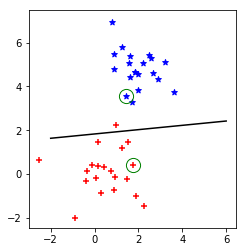

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.axes().set_aspect("equal")
np.random.seed(0)
X0 = np.random.randn(20, 2)
X1 = np.random.randn(20, 2) + np.array([2.5, 5])
y = np.array([1] * 20 + [-1] * 20)

X = np.r_[X0, X1]
model = SoftSVC(C = 100)
model.fit(X, y)

plt.scatter(X0[:, 0], X0[:, 1], color="r", marker="+")
plt.scatter(X1[:, 0], X1[:, 1], color="b", marker="*")

def f(model, x):
    return (-model.w0_ - model.w_[0] * x) / model.w_[1]

x1 = -2
x2 = 6

plt.plot([x1, x2], [f(model, x1), f(model, x2)], color="k")

print("正しく分類できた数：", (model.predict(X) == y).sum())
plt.scatter(X[model.a_ != 0, 0], X[model.a_ != 0, 1], s=200, color=(0, 0, 0, 0), edgecolor="g", marker="o")
plt.show()

# 公式にバグ有り

# カーネル法

今までは超平面(直線)を使って分類することを考えてきたが、これを超平面(曲線)で分類するようにする方法がカーネル法。非線形で分類する。

非線形写像$\phi : \mathbb{R}^{d} \leftarrow \mathbb{R}^{d}$を用いて分離超平面が下記で表現できると仮定する。

$$
    w_{0} + \boldsymbol{w}^{T}\phi(\boldsymbol{x})
$$

$$
    Max\;f(\boldsymbol{a}) = \sum_{i=1}^{n}a_{k} - \frac{1}{2} \sum_{i=1}^{n} \sum_{l=1}^{n} a_{i} a_{l} y_{i} y_{l} \phi(\boldsymbol{x}_{i})^{T}\phi(\boldsymbol{x}_{l}) \\
    s.t \quad \sum_{i=1}^{n}a_{i}y_{i}=0 \\
    0 \le a_{i} \le C
$$

$\boldsymbol{x}$を写像変換したあとの内積を明示的に計算せずに、カーネル関数に置き換えてしまう。  
$$
    \phi(\boldsymbol{x}_{i})^{T}\phi(\boldsymbol{x}_{l}) = K(\boldsymbol{x}_{i}, \boldsymbol{x}_{l})
$$

目的関数$f(\boldsymbol{a})$の$\boldsymbol{a}$についての勾配の第t成分は以下となる。  
$$
    \nabla f(\boldsymbol{a})_{t} = 1 - \sum_{l=1}^{n}a_{l}y_{t}y_{l}K(\boldsymbol{x}_{t},\boldsymbol{x}_{l})
$$

最適解$\hat{\boldsymbol{a}}_{i}$は  
$$
    \hat{a_{i}} = \frac{1}{K(\boldsymbol{x}_{i},\boldsymbol{x}_{i}) + K(\boldsymbol{x}_{j},\boldsymbol{x}_{j}) - 2K(\boldsymbol{x}_{i},\boldsymbol{x}_{j})} \Biggl[ 1 - y_{i}y_{j} + y_{i}\bigl\{ (K(\boldsymbol{x}_{i},\boldsymbol{x}_{j}) - K(\boldsymbol{x}_{j},\boldsymbol{x}_{j})) \sum_{k \neq i, j}^{n}a_{k}y_{k} - y_{i}\sum_{k \neq i, j}a_{k}y_{k}(K(\boldsymbol{x}_{i},\boldsymbol{x}_{k}) - K(\boldsymbol{x}_{j},\boldsymbol{x}_{k})) \bigr\} \Biggr]
$$

予測値の計算は$w_{0}+\boldsymbol{w}^{T}\phi(\boldsymbol{x})$を評価する必要があるが、$\boldsymbol{w}^{T}\phi(\boldsymbol{w})$をカーネル関数を使って計算できる。

$$
\begin{align}
    \boldsymbol{w}^{T}\phi(\boldsymbol{x}) &= \sum_{i=1}^{n}a_{i}y_{i}\phi(\boldsymbol{x}_{i})^{T}\phi(\boldsymbol{x}) \\
    &= \sum_{i=1}^{n}a_{i}y_{i}K(\boldsymbol{x}_{i}, \boldsymbol{x}) \\
    &= \sum_{i \in S}a_{i}y_{i}K(\boldsymbol{x}_{i}, \boldsymbol{x})
\end{align}
$$

ただし、$S=\{i|a_{i} \neq 0\}$

n=3, d=3の場合
$$
\phi(\boldsymbol{x}_{i})=(\phi(x_{1}^{i}), \phi(x_{2}^{i}), \phi(x_{3}^{i})) \\
\begin{align}
    \sum_{i=1}^{3}a_{i}y_{i}\phi(\boldsymbol{x}_{i})^{T}\phi(\boldsymbol{x}) &= a_{1}y_{1}\phi(\boldsymbol{x}_{1})\phi(\boldsymbol{x}) + a_{2}y_{2}\phi(\boldsymbol{x}_{2})\phi(\boldsymbol{x}) + a_{3}y_{3}\phi(\boldsymbol{x}_{3})\phi(\boldsymbol{x}) \\
    &= a_{1}y_{1}(\phi_{1}^{(1)}, \phi_{2}^{(1)}, \phi_{3}^{(1)})\phi(\boldsymbol{x}) + a_{2}y_{2}(\phi_{1}^{(2)}, \phi_{2}^{(2)}, \phi_{3}^{(2)})\phi(\boldsymbol{x}) + a_{3}y_{3}(\phi_{1}^{(3)}, \phi_{2}^{(3)}, \phi_{3}^{(3)})\phi(\boldsymbol{x}) \\
     &= \biggl(a_{1}y_{1}(\phi_{1}^{(1)}, \phi_{2}^{(1)}, \phi_{3}^{(1)}) + a_{2}y_{2}(\phi_{1}^{(2)}, \phi_{2}^{(2)}, \phi_{3}^{(2)}) + a_{3}y_{3}(\phi_{1}^{(3)}, \phi_{2}^{(3)}, \phi_{3}^{(3)})\biggr)\phi(\boldsymbol{x}) \\
     &= \biggl(a_{1}y_{1}\phi_{1}^{(1)}+a_{2}y_{2}\phi_{1}^{(2)}+a_{3}y_{3}\phi_{1}^{(3)}, a_{1}y_{1}\phi_{2}^{(1)}+a_{2}y_{2}\phi_{2}^{(2)}+
     a_{3}y_{3}\phi_{2}^{(3)}, a_{1}y_{1}\phi_{3}^{(1)}+a_{2}y_{2}\phi_{3}^{(2)}+a_{3}y_{3}\phi_{3}^{(3)}\biggr)\phi(\boldsymbol{x}) \\
     &= \biggl(a_{1}y_{1}\phi_{1}^{(1)}+a_{2}y_{2}\phi_{1}^{(2)}+a_{3}y_{3}\phi_{1}^{(3)}, a_{1}y_{1}\phi_{2}^{(1)}+a_{2}y_{2}\phi_{2}^{(2)}+
     a_{3}y_{3}\phi_{2}^{(3)}, a_{1}y_{1}\phi_{3}^{(1)}+a_{2}y_{2}\phi_{3}^{(2)}+a_{3}y_{3}\phi_{3}^{(3)}\biggr)
     \begin{pmatrix}
         \phi(x_{1})\\
         \phi(x_{2})\\
         \phi(x_{3})
     \end{pmatrix}
\end{align}
$$

$$
    w_{0} = \frac{1}{|S|}\sum_{k \in S}\biggl(y_{k} - \sum_{l \in S}a_{l}y_{l}K(\boldsymbol{x}_{k}, \boldsymbol{x}_{l})\biggr)
$$

カーネル関数 放射基底関数(Radical Basis Function: RBF) 
$$
K(\boldsymbol{x}_{k}, \boldsymbol{x}) = \exp{\biggr(-\frac{||\boldsymbol{x}_{k} - \boldsymbol{x}||^{2}}{2\sigma^{2}}\biggr)}
$$

実装 RBF-SVM

In [43]:
import numpy as np
from operator import itemgetter

class RBFKernel:
    def __init__(self, X, sigma):
        self.sigma2 = sigma**2
        self.X = X
        self.values_ = np.empty((X.shape[0], X.shape[0]))
        
    def value(self, i, j):
        return np.exp(-((self.X[i,:] - self.X[j,:])**2).sum() / (2*self.sigma2))
    
    def eval(self, Z, s):
        return np.exp(-((self.X[s,np.newaxis,:] - Z[np.newaxis,:,:])**2).sum(axis=2) / (2*self.sigma2))
    

class RBFSoftSVC:
    def __init__(self, C=1.0, sigma=1.0, max_iter=10000):
        self.C_ = C
        self.sigma_ = sigma
        self.max_iter = max_iter
        self.a_ = None
        self.y_ = None
        self.kernel_ = None
        self.w0_ = None
        
    def fit(self, X, y, selections=None):
        a = np.zeros(X.shape[0])
        ay = 0
        kernel = RBFKernel(X, self.sigma_)
        indices = np.arange(X.shape[0])
        for _ in range(self.max_iter):
            s = (a != 0.0)
            ydf = y*(1 - y*np.dot(a[s]*y[s], kernel.eval(X,s)).T)
            iydf = np.c_[indices, ydf]
            i = int(min(iydf[((a > 0) & (y > 0)) | ((a < self.C_) & (y < 0))], key=itemgetter(1))[0])
            j = int(max(iydf[((a > 0) & (y < 0)) | ((a < self.C_) & (y > 0))], key=itemgetter(1))[0])
            
            if ydf[i] >= ydf[j]:
                break
                
            ay2 = ay - y[i]*a[i] - y[j]*a[j]
            kii = kernel.value(i,i)
            kij = kernel.value(i,j)
            kjj = kernel.value(j,j)
            s = (a != 0.0)
            s[i] = False
            s[j] = False
            kxi = kernel.eval(X[i,:].reshape(1,-1),s).ravel()
            kxj = kernel.eval(X[j,:].reshape(1,-1),s).ravel()
            ai = (1 - y[i]*y[j] + y[i]*((kij - kjj)*ay2 - (a[s]*y[s]*(kxi - kxj)).sum())) / (kii + kjj - 2*kij)
            if ai < 0:
                ai = 0
            elif ai > self.C_:
                ai = self.C_
            aj = (-ai*y[i] - ay2)*y[j]
            if aj < 0:
                aj = 0
                ai = (-aj*y[j] - ay2)*y[i]
            elif aj > self.C_:
                aj = self.C_
                ai = (-aj*y[j] - ay2)*y[i]
            ay += y[i]*(ai - a[i]) + y[j]*(aj - a[j])
            if ai == a[i]:
                break
            a[i] = ai
            a[j] = aj
        
        self.a_ = a
        self.y_ = y
        self.kernel_ = kernel
        s = (a != 0.0)
        self.w0_ = (y[s] - np.dot(a[s]*y[s], kernel.eval(X[s], s))).sum() / s.sum()
        
    def predict(self, X):
        s = (self.a_ != 0.0)
        return np.sign(self.w0_ + np.dot(self.a_[s]*self.y_[s], self.kernel_.eval(X,s)))
        

正しく分類できた数: 0


/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/envs/Education/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


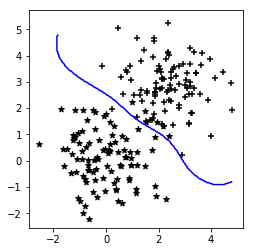

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.axes().set_aspect("equal")
np.random.seed(0)
x0 = np.random.randn(100, 2)
x1 = np.random.randn(100, 2) + np.array([2.5, 3])
y = np.array([1]*100 + [-1]*100)
x = np.r_[x0, x1]

model = RBFSoftSVC()
model.fit(x,y)

xmin, xmax = x[:,0].min(), x[:,0].max()
ymin, ymax = x[:,1].min(), x[:,1].max()

plt.scatter(x0[:,0], x0[:,1], color='k', marker='*')
plt.scatter(x1[:,0], x1[:,1], color='k', marker='+')


xmesh, ymesh = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(xmin, xmax, 200))
Z = model.predict(np.c_[xmesh.ravel(), ymesh.ravel()]).reshape(xmesh.shape)
plt.contour(xmesh, ymesh, Z, levels=[0], colors='b')

print("正しく分類できた数:", (np.array(model.predict(X) == y)).sum())
plt.show()

# scikit-learn SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

領域分類の関数

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # ZはN次元の予測値ベクトル
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    print("xx1.ravel()", len(xx1.ravel()), xx1.ravel())
    print("xx2.ravel()", len(xx2.ravel()), xx2.ravel())

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    # テストサンプルを目立たせる（点を○で表示)
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolors='black', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')
        

irisデータ・セットを準備

In [12]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print("Class labels:", np.unique(y))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

Class labels: [0 1 2]


### 線形SVM(SVC)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


xx1.ravel() 86900 [0.   0.02 0.04 ... 7.84 7.86 7.88]
xx2.ravel() 86900 [-0.9  -0.9  -0.9  ...  3.48  3.48  3.48]


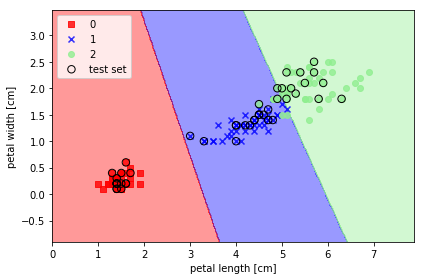

In [20]:
# スラック変数Cの値が大きいほど、誤判定を許容する
svc = SVC(kernel='linear', C=0.01, random_state=1)
svc.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=svc, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 確率的勾配降下法に基づくSVC

/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/envs/Education/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all po

xx1.ravel() 86900 [0.   0.02 0.04 ... 7.84 7.86 7.88]
xx2.ravel() 86900 [-0.9  -0.9  -0.9  ...  3.48  3.48  3.48]


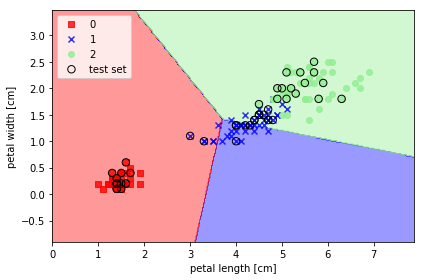

In [21]:
from sklearn.linear_model import SGDClassifier

# SVC = コスト：ヒンジ関数、ペナルティ：L2ノルム, α=C(スラック変数)
sgd_svc = SGDClassifier(loss='hinge', penalty='l2', alpha=0.01)
sgd_svc.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=sgd_svc, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### RBF_SVC

$$
\begin{align}
    K(\boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)}) &= \exp\bigl(-\frac{||\boldsymbol{x}^{(i)} - \boldsymbol{x}^{(j)}||^{2}}{2 \sigma^{2}}\bigr) \\
    &= \exp\bigl(-\gamma||\boldsymbol{x}^{(i)} - \boldsymbol{x}^{(j)}||^{2}\bigr)
\end{align}
$$

線形分離不可能なデータ・セットを準備

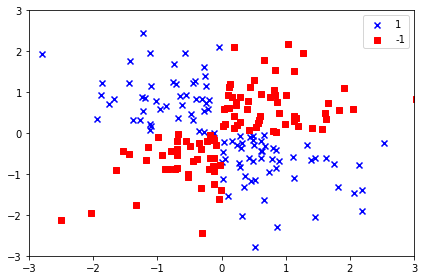

In [23]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # 排他的論理和
y_xor = np.where(y_xor, 1, -1) # 排他的論理和の値が真の場合１，そうでない場合-1
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

$\gamma$を大きくするとトレーニングサンプルの影響がおおきくなる。  
Cを大きくすると間違いを許容するようになる

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


xx1.ravel() 141904 [-3.793085 -3.773085 -3.753085 ...  3.986915  4.006915  4.026915]
xx2.ravel() 141904 [-3.78253447 -3.78253447 -3.78253447 ...  3.43746553  3.43746553
  3.43746553]


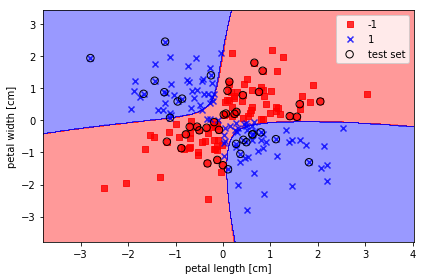

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


xx1.ravel() 141904 [-3.793085 -3.773085 -3.753085 ...  3.986915  4.006915  4.026915]
xx2.ravel() 141904 [-3.78253447 -3.78253447 -3.78253447 ...  3.43746553  3.43746553
  3.43746553]


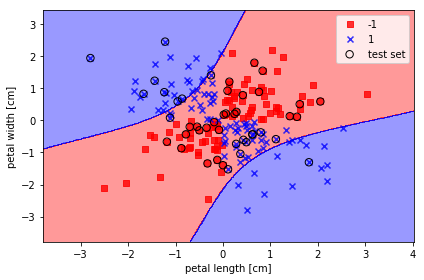

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


xx1.ravel() 141904 [-3.793085 -3.773085 -3.753085 ...  3.986915  4.006915  4.026915]
xx2.ravel() 141904 [-3.78253447 -3.78253447 -3.78253447 ...  3.43746553  3.43746553
  3.43746553]


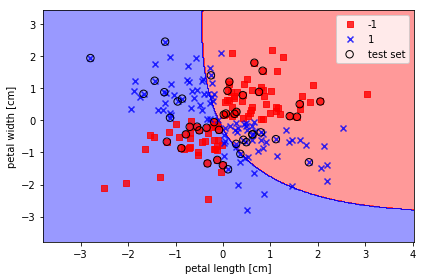

In [25]:
for c, g in zip([10, 1, 0.1], [0.1, 0.05, 0.01]):
    rbf_svc = SVC(kernel='rbf', C=c, gamma=g, random_state=1)
    rbf_svc.fit(X_xor, y_xor)
    plot_decision_regions(X_xor, y_xor, classifier=rbf_svc, test_idx=range(105, 150))
    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()